In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
   
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | saint-pierre
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | waingapu
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | xai-xai
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | shubarkuduk
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | camacha
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | la ronge
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipp

Processing Record 36 of Set 4 | kemijarvi
Processing Record 37 of Set 4 | zhuanghe
Processing Record 38 of Set 4 | nikolskoye
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 4 | fredonia
Processing Record 42 of Set 4 | popovo
Processing Record 43 of Set 4 | eisiskes
Processing Record 44 of Set 4 | san carlos de bariloche
Processing Record 45 of Set 4 | nizwa
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | laredo
Processing Record 48 of Set 4 | asau
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | tarata
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | metro
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | kloulklubed
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | pochutla
Processing Record 7 of Set 5 | antalaha
Processing Record 8 of Set 5 | bilibino
Pr

Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | keti bandar
Processing Record 31 of Set 8 | uyar
Processing Record 32 of Set 8 | chipinge
Processing Record 33 of Set 8 | crystal beach
Processing Record 34 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 8 | andenes
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | alugan
Processing Record 38 of Set 8 | southbridge
Processing Record 39 of Set 8 | kalpi
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | ginda
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | alta
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | banyo
Processing Record 47 of Set 8 | dawei
Processing Record 48 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 8 | taoudenni
Processing Record 50 of Set 8 | liaocheng
Processing Record 1 of Set 9 | mukhen
Pr

Processing Record 19 of Set 12 | amazar
Processing Record 20 of Set 12 | aras
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | montrose
Processing Record 23 of Set 12 | axim
Processing Record 24 of Set 12 | waynesboro
Processing Record 25 of Set 12 | ostersund
Processing Record 26 of Set 12 | weyburn
Processing Record 27 of Set 12 | eningen
Processing Record 28 of Set 12 | trebinje
Processing Record 29 of Set 12 | grants pass
Processing Record 30 of Set 12 | xihua
Processing Record 31 of Set 12 | zverinogolovskoye
Processing Record 32 of Set 12 | zhangye
Processing Record 33 of Set 12 | abu zabad
Processing Record 34 of Set 12 | tual
Processing Record 35 of Set 12 | zaraza
Processing Record 36 of Set 12 | gimli
Processing Record 37 of Set 12 | terrace
Processing Record 38 of Set 12 | marystown
Processing Record 39 of Set 12 | oyo
Processing Record 40 of Set 12 | katsuura
Processing Record 41 of Set 12 | sosnovo-ozerskoye
Processing Record 42 of Set 12 

In [11]:
len(city_data)

554

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.36,79,40,8.05,TO,2022-01-31 22:11:31
1,Beringovskiy,63.0500,179.3167,-1.50,90,94,17.83,RU,2022-01-31 22:11:31
2,Tiksi,71.6872,128.8694,-11.20,99,100,6.62,RU,2022-01-31 22:11:31
3,Saint-Pierre,-21.3393,55.4781,78.48,78,40,6.91,RE,2022-01-31 22:11:32
4,Cape Town,-33.9258,18.4232,75.11,78,11,4.72,ZA,2022-01-31 22:09:14
5,Bathsheba,13.2167,-59.5167,84.81,65,40,11.50,BB,2022-01-31 22:11:32
6,Georgetown,5.4112,100.3354,80.53,80,20,5.75,MY,2022-01-31 22:07:06
7,Ushuaia,-54.8000,-68.3000,42.46,81,75,34.52,AR,2022-01-31 22:11:33
8,Saint-Philippe,-21.3585,55.7679,78.39,79,97,14.79,RE,2022-01-31 22:11:33
9,Waingapu,-9.6567,120.2641,77.67,85,92,10.18,ID,2022-01-31 22:11:33


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-31 22:11:31,-21.2000,-175.2000,84.36,79,40,8.05
1,Beringovskiy,RU,2022-01-31 22:11:31,63.0500,179.3167,-1.50,90,94,17.83
2,Tiksi,RU,2022-01-31 22:11:31,71.6872,128.8694,-11.20,99,100,6.62
3,Saint-Pierre,RE,2022-01-31 22:11:32,-21.3393,55.4781,78.48,78,40,6.91
4,Cape Town,ZA,2022-01-31 22:09:14,-33.9258,18.4232,75.11,78,11,4.72


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

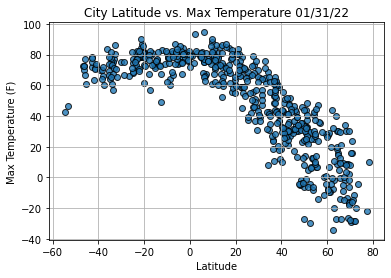

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

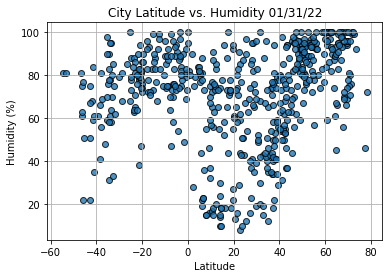

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

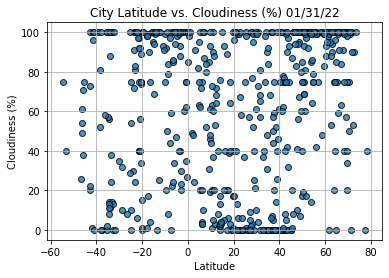

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()